In [172]:
# 경고(warning) 비표시
# import warnings

# warnings.filterwarnings('ignore')

# 웹에서 주문수를 분석

### 1.  데이터 읽기

In [173]:
# customer_master.csv : 쇼핑몰 사이트의 고객 정보
import pandas as pd


customer = pd.read_csv('.\Data-in\customer_master.csv')

customer.head(3)


,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시


In [174]:
# item_master.csv : 상품데이터

item = pd.read_csv('./Data-in/item_master.csv')

item.head(3)

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000


In [175]:
# transaction_1.csv와 transaction_2.csv : 구매내역 데이터

tran_1 = pd.read_csv('./Data-in/transaction_1.csv')

tran_2 = pd.read_csv('./Data-in/transaction_2.csv')

tran_1.head(3)
tran_2.head(3)

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757


### 2. 데이터 결합(유니언)

In [176]:
# concat : 세로로 합치기

tran=pd.concat([tran_1,tran_2], ignore_index= True)

tran.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [177]:
## len() : 길이 확인
len(tran)

6786

### 3. 매출 데이터끼리 결합(조인)

In [178]:
tran_detail_1 = pd.read_csv('./Data-in/transaction_detail_1.csv')
tran_detail_2 = pd.read_csv('./Data-in/transaction_detail_2.csv')


In [179]:
tran_detail_1

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
4995,4995,T0000004865,S003,1
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1


In [180]:
tran_detail_2

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2
...,...,...,...,...
2139,7139,T0000006894,S004,1
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1


In [181]:
tran_detail = pd.concat([tran_detail_1,tran_detail_2], ignore_index=True)

In [182]:
tran_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [183]:
# tran_total=pd.merge(tran_detail, tran, how='left')

tran_total = pd.merge(tran_detail, tran[["transaction_id", \
    "payment_date", "customer_id"]],
                    on="transaction_id", how="left")
tran_total.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


### 4. 마스터데이터를 결합(조인)

In [184]:
tran_total.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [185]:
len(item)

5

In [186]:
len(customer)

5000

In [187]:
tran_total2=pd.merge(tran_total, item, on='item_id', how='left')

len(tran_total2)

7144

In [188]:
tran_final=pd.merge(tran_total2, customer, on='customer_id', how='left')

In [189]:
tran_final.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


### 5. 필요한 데이터 컬럼 만들기

In [190]:
tran_final["price"] = tran_final["quantity"] * tran_final["item_price"]
tran_final[["quantity", "item_price","price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### 6. 데이터 검산

In [191]:
print(tran_final["price"].sum())
print(tran["price"].sum())

971135000
971135000


### 7. 각종 통계량 파악

In [192]:
tran_final.isna().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
item_name            0
item_price           0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
price                0
dtype: int64

In [193]:
tran_final.describe()

,detail_id,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


In [194]:
print(tran_final['payment_date'].min())
print(tran_final['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### 8. 월별 데이터 집계

In [195]:
tran_final.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
item_name            object
item_price            int64
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
price                 int64
dtype: object

In [196]:
# payment_data를 datetime형으로 변환
# 구입일 : payment_date에서 연월을 추출 후 새로운 컬럼 추가
# 연월 단위로 price 집계

tran_final['payment_date'] = pd.to_datetime(tran_final['payment_date'])

tran_final['year_month'] = tran_final['payment_date'].dt.to_period('M')


In [197]:
tran_final.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref,price,year_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,210000,2019-02
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,50000,2019-02
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,120000,2019-02
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,210000,2019-02
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,170000,2019-02


In [198]:
price_by_year_month= tran_final.groupby('year_month')['price'].sum().to_frame().reset_index()

price_by_year_month

,year_month,price
0,2019-02,160185000
1,2019-03,160370000
2,2019-04,160510000
3,2019-05,155420000
4,2019-06,164030000
5,2019-07,170620000


In [199]:
import matplotlib.pyplot as plt


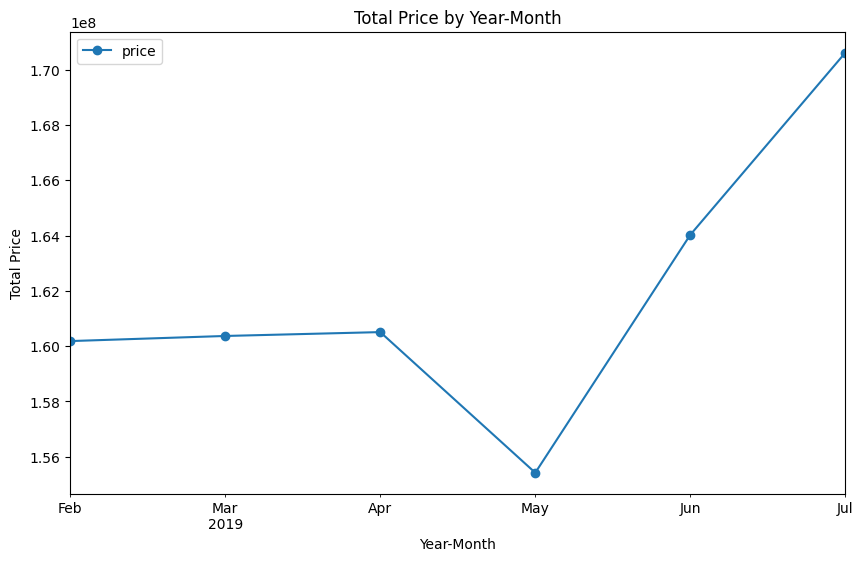

In [200]:
price_by_year_month.plot(x='year_month', y='price', kind='line', figsize=(10, 6), marker='o')

plt.xlabel('Year-Month')
plt.ylabel('Total Price')
plt.title('Total Price by Year-Month')

plt.xticks(rotation=45)

plt.show()


### 9. 월별, 상품별 데이터 집계

In [201]:
## groupby
tran_final[['year_month' , 'item_name','price','quantity']]. groupby(['year_month', 'item_name']).sum()

price  quantity
year_month item_name                    
2019-02    PC-A       24150000       483
           PC-B       25245000       297
           PC-C       19800000       165
           PC-D       31140000       173
           PC-E       59850000       285
2019-03    PC-A       26000000       520
           PC-B       25500000       300
           PC-C       19080000       159
           PC-D       25740000       143
           PC-E       64050000       305
2019-04    PC-A       25900000       518
           PC-B       23460000       276
           PC-C       21960000       183
           PC-D       24300000       135
           PC-E       64890000       309
2019-05    PC-A       24850000       497
           PC-B       25330000       298
           PC-C       20520000       171
           PC-D       25920000       144
           PC-E       58800000       280
2019-06    PC-A       26000000       520
           PC-B       23970000       282
           PC-C       21840000       182
           PC-D       28800000       160
           PC-E       63420000       302
2019-07    PC-A       25250000       505
           PC-B       28220000       332
           PC-C       19440000       162
           PC-D       26100000       145
           PC-E       71610000       341

In [202]:
## pivot table

trans_pivot= tran_final.pivot_table(index='item_name', columns='year_month', values=['price','quantity'], aggfunc='sum')
trans_pivot.head(10)

price                                                    \
year_month   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   
item_name                                                                
PC-A        24150000  26000000  25900000  24850000  26000000  25250000   
PC-B        25245000  25500000  23460000  25330000  23970000  28220000   
PC-C        19800000  19080000  21960000  20520000  21840000  19440000   
PC-D        31140000  25740000  24300000  25920000  28800000  26100000   
PC-E        59850000  64050000  64890000  58800000  63420000  71610000   

           quantity                                          
year_month  2019-02 2019-03 2019-04 2019-05 2019-06 2019-07  
item_name                                                    
PC-A            483     520     518     497     520     505  
PC-B            297     300     276     298     282     332  
PC-C            165     159     183     171     182     162  
PC-D            173     143     135     144     160     145  
PC-E            285     305     309     280     302     341

### 10. 상품별 매출 추이 가시화

In [203]:
graph_data = pd.pivot_table(tran_final, index='year_month', columns='item_name', values='price', aggfunc='sum')

graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
year_month,,,,,
2019-02,24150000,25245000,19800000,31140000,59850000
2019-03,26000000,25500000,19080000,25740000,64050000
2019-04,25900000,23460000,21960000,24300000,64890000
2019-05,24850000,25330000,20520000,25920000,58800000
2019-06,26000000,23970000,21840000,28800000,63420000


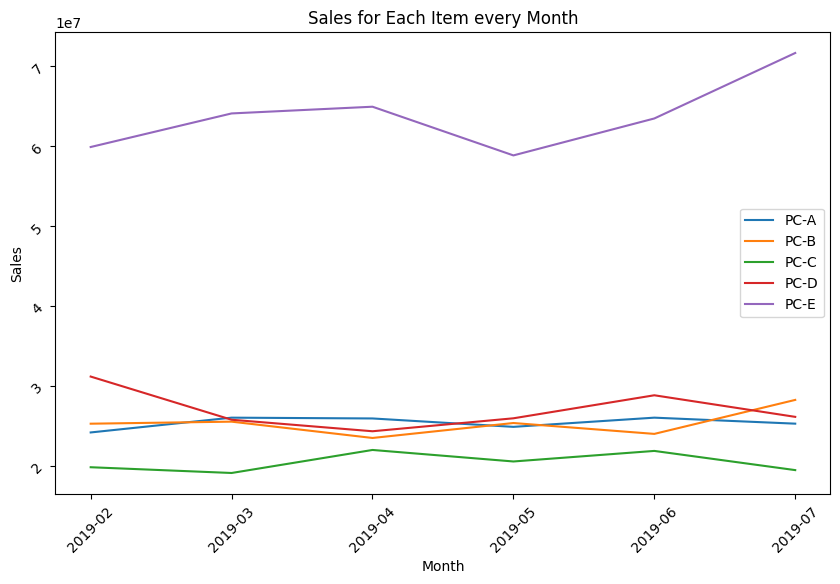

In [214]:

graph_data.index = graph_data.index.astype(str)

plt.figure(figsize=(10, 6)) 


for column in graph_data.columns:
    plt.plot(graph_data.index, graph_data[column], label=column)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales for Each Item every Month')


plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.legend()



plt.show()
